In [ ]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.9/513.9 kB 5.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

### Root Locus 그리기

$$L(s) = \frac{s + 2}{s^2+2s+3}$$

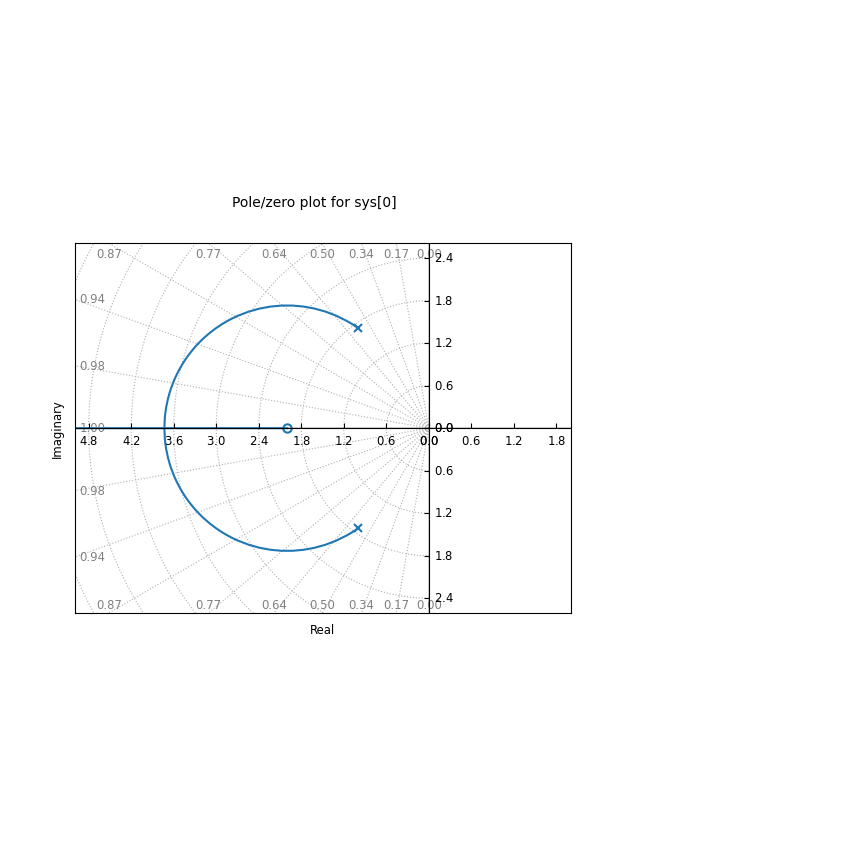

In [ ]:
L = ctl.tf([1,2],[1,2,3])
roots, gains = ctl.root_locus(L, xlim=[-5, 2], ylim=[-2, 2], plot=True)

### Root Locus를 이용해 Gain(K) 결정하기 (P-Controller)

$$L(s) = \frac{s + 7}{s(s + 5)(s + 15)(s + 20)}$$

##### **Objectives**
* %overshoot < 5% $\rightarrow \zeta<0.7$
* $T_r < 1s \rightarrow \omega_n > 1.8$

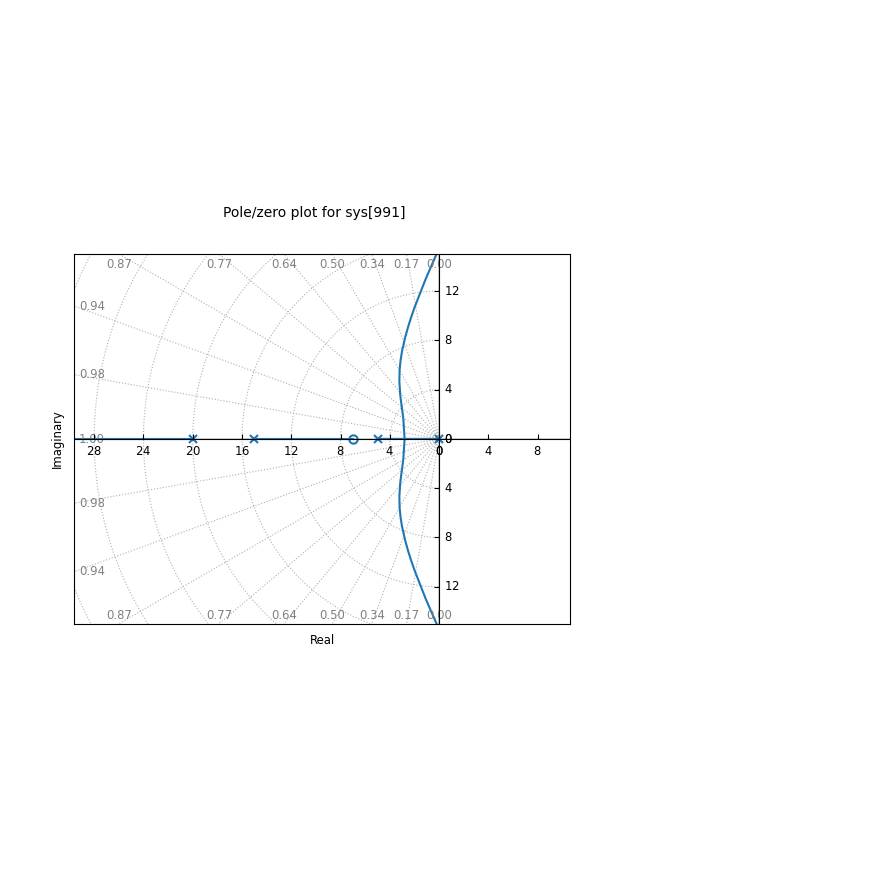

In [ ]:
s = ctl.tf([1,0],[1])
L = (s + 7)/(s*(s + 5)*(s + 15)*(s + 20))
roots, gains = ctl.root_locus(L, xlim=[-22, 3], ylim=[-15, 15], plot=True)

In [ ]:
roots, gains

(array([[-1.00000000e+00-1.41421356e+00j, -1.00000000e+00+1.41421356e+00j],
        [-1.03867412e+00-1.44078192e+00j, -1.03867412e+00+1.44078192e+00j],
        [-1.07734823e+00-1.46584915e+00j, -1.07734823e+00+1.46584915e+00j],
        [-1.11602235e+00-1.48949103e+00j, -1.11602235e+00+1.48949103e+00j],
        [-1.15469647e+00-1.51177443e+00j, -1.15469647e+00+1.51177443e+00j],
        [-1.30939294e+00-1.58841490e+00j, -1.30939294e+00+1.58841490e+00j],
        [-1.46408941e+00-1.64705793e+00j, -1.46408941e+00+1.64705793e+00j],
        [-1.61878588e+00-1.68957858e+00j, -1.61878588e+00+1.68957858e+00j],
        [-1.77348235e+00-1.71717493e+00j, -1.77348235e+00+1.71717493e+00j],
        [-1.92817882e+00-1.73056110e+00j, -1.92817882e+00+1.73056110e+00j],
        [-2.08287529e+00-1.73006696e+00j, -2.08287529e+00+1.73006696e+00j],
        [-2.23757176e+00-1.71568052e+00j, -2.23757176e+00+1.71568052e+00j],
        [-2.39226823e+00-1.68704642e+00j, -2.39226823e+00+1.68704642e+00j],
        [-2.

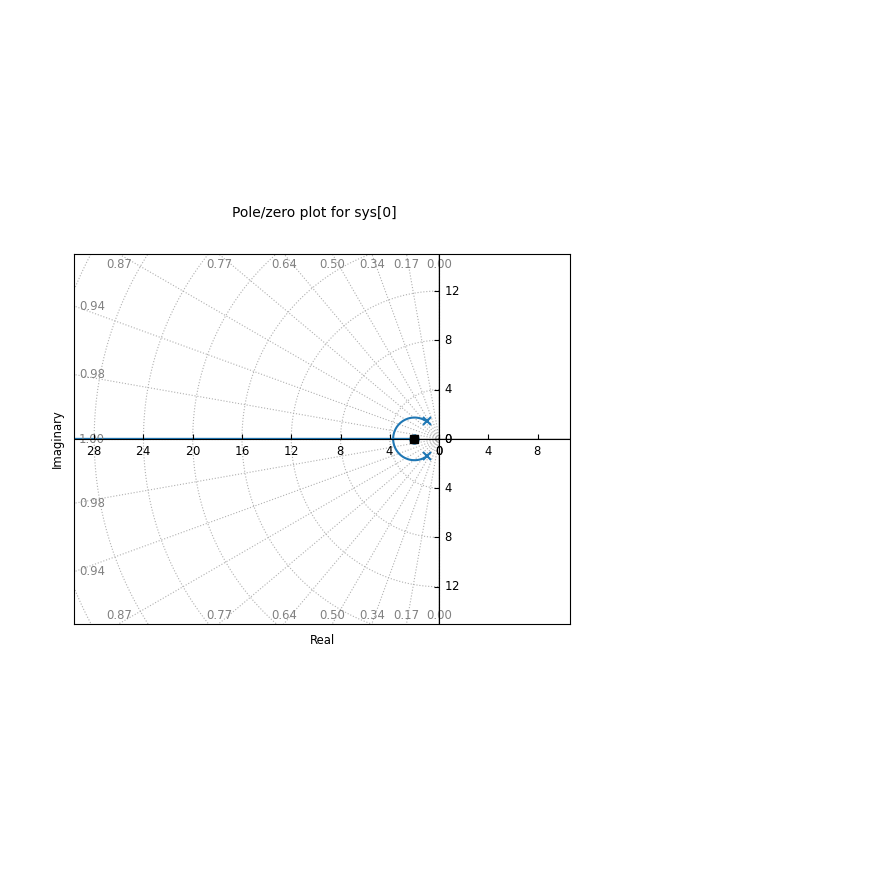

(0.0, 2.5, 0.0, 1.1)

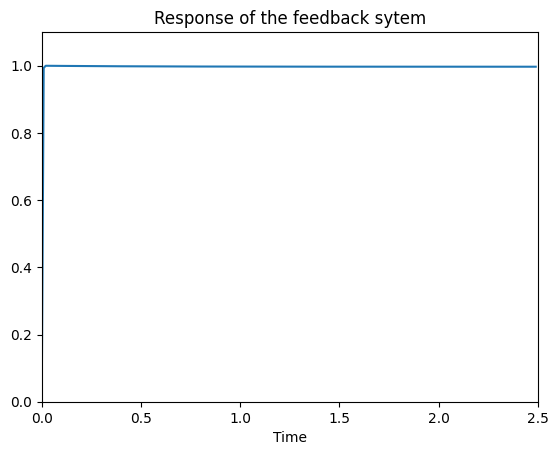

In [ ]:
K = 500
roots, gains = ctl.root_locus(L, initial_gain=K, xlim=[-22, 3], ylim=[-15, 15], plot=True)
plt.show()
T = ctl.feedback(K*L,1)
t,y = ctl.step_response(T, np.arange(0,2.5,0.01))
plt.plot(t,y)
plt.xlabel('Time')
plt.title('Response of the feedback sytem')
plt.axis([0, 2.5, 0, 1.1])